In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress
import sklearn.datasets as dta
import seaborn as sns

In [2]:
YT_data = pd.read_csv("US_youtube_trending_data.csv")
YT_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
YT_data.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [4]:
# print ("Rows     : " , YT_data.shape[0]) #Displays numbers of rows .
# print ("Columns  : " , YT_data.shape[1]) # and column our dataset contains.
# print ("\nFeatures : \n", YT_data.columns.tolist())#displays column names
# print ("\nMissing values :  ", YT_data.isnull().sum().values.sum())   #find missing values
# print ("\nUnique values :  \n", YT_data.nunique()) # Count distinct observations

In [5]:
#YT_data.isna().sum()

In [6]:
YT_data.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
dtype: object

In [7]:
#changing published date , trending_date to datetime datatype.
YT_data.publishedAt= pd.to_datetime(YT_data.publishedAt)
#YT_data.trending_date= pd.to_datetime(YT_data.trending_date)
# Adding column for year to the dataframe
YT_data['Year']=YT_data['publishedAt'].dt.year
YT_data['Month']=YT_data['publishedAt'].dt.month
YT_data.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,Year,Month
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,2020,8
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",2020,8
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,2020,8
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,2020,8
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,2020,8


In [8]:
YT_data.describe().applymap('{:,.2f}'.format)

,categoryId,view_count,likes,dislikes,comment_count,Year,Month
count,"143,390.00","143,390.00","143,390.00","143,390.00","143,390.00","143,390.00","143,390.00"
mean,18.85,"2,627,201.34","140,249.69","2,126.22","11,608.08","2,021.08",6.48
std,6.78,"6,839,864.10","403,368.89","10,921.67","82,834.83",0.69,3.45
min,1.00,0.00,0.00,0.00,0.00,"2,020.00",1.00
25%,17.00,"505,768.75","20,341.00",0.00,"1,426.00","2,021.00",4.00
50%,20.00,"1,036,178.00","47,917.00",400.00,"3,256.00","2,021.00",6.00
75%,24.00,"2,338,435.25","120,706.25","1,379.00","7,857.00","2,022.00",10.00
max,29.00,"264,407,389.00","16,021,534.00","879,354.00","6,738,537.00","2,022.00",12.00


Most popular trending videos- based on likes, view counts, and unique days the video trended
    What drives a video’s popularity? Likes or dislikes
    Correlation of view counts and likes
    Correlation of view counts and dislikes 


In [9]:
YT_data.count()

video_id             143390
title                143390
publishedAt          143390
channelId            143390
channelTitle         143390
categoryId           143390
trending_date        143390
tags                 143390
view_count           143390
likes                143390
dislikes             143390
comment_count        143390
thumbnail_link       143390
comments_disabled    143390
ratings_disabled     143390
description          139727
Year                 143390
Month                143390
dtype: int64

In [10]:
YT_data["likes"].count()

143390

In [17]:
like_view = YT_data[["view_count", "likes", "dislikes"]]
like_view

,view_count,likes,dislikes
0,1514614,156908,5855
1,2381688,146739,2794
2,2038853,353787,2628
3,496771,23251,1856
4,1123889,45802,964
...,...,...,...
143385,414168,3509,0
143386,728579,6243,0
143387,924917,19340,0
143388,13706188,694419,0


In [18]:
like_view.describe().applymap('{:,.2f}'.format)

,view_count,likes,dislikes
count,"143,390.00","143,390.00","143,390.00"
mean,"2,627,201.34","140,249.69","2,126.22"
std,"6,839,864.10","403,368.89","10,921.67"
min,0.00,0.00,0.00
25%,"505,768.75","20,341.00",0.00
50%,"1,036,178.00","47,917.00",400.00
75%,"2,338,435.25","120,706.25","1,379.00"
max,"264,407,389.00","16,021,534.00","879,354.00"


In [19]:
#sns.relplot(data=like_view, x="view_count", y="likes");

In [20]:
# views = like_view["view_count"]
# likes = like_view['likes']

# plt.scatter(views, likes, label = "Views vs. Likes")
# plt.legend(loc='best')
# plt.xlim(0, 265000000, 100000)
# plt.ylim(0, 16000000, 100000)
# # plt.show()
# print(f"The correlation coefficient between View Counts and Likes is {round(st.pearsonr(views,likes)[0],2)}")

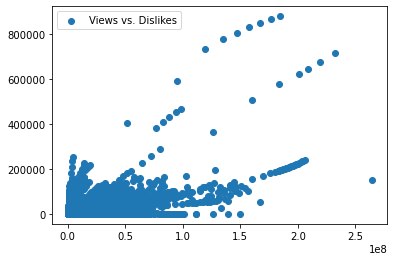

NameError: name 'st' is not defined

In [21]:
views = like_view["view_count"]
dislikes = like_view['dislikes']

plt.scatter(views, dislikes, label = "Views vs. Dislikes")
plt.legend(loc='best')
plt.show()
print(f"The correlation coefficient between View Counts and Dislikes is {round(st.pearsonr(views,dislikes)[0],2)}")

The r-squared is: 0.6979767568296881


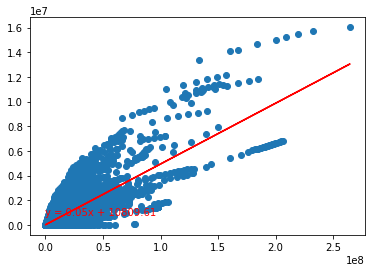

In [27]:
x_values = like_view['view_count']
y_values = like_view['likes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,800000),fontsize=10,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.38309978840933556


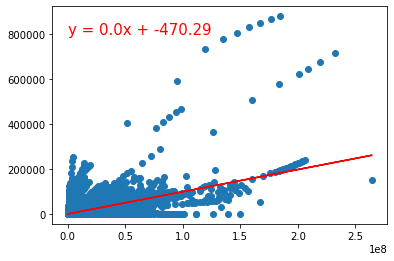

In [24]:
x_values = like_view['view_count']
y_values = like_view['dislikes']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1.5,800000),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()